# Individual Analysis for the H-D Spectrum Experiment

In [1]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel
%matplotlib inline

In [2]:
Na = pd.read_csv('Na_D_lines_run1.CSV',skiprows=15)

In [3]:
Na[:10]

,TIME,CH1,CH1 Peak Detect
0,-20.000,-0.020,-0.012
1,-19.992,-0.012,-0.028
2,-19.985,-0.020,-0.012
3,-19.977,-0.020,-0.028
4,-19.969,-0.020,-0.012
5,-19.962,-0.020,-0.028
6,-19.954,-0.020,-0.012
7,-19.946,-0.020,-0.028
8,-19.939,-0.020,-0.004
9,-19.931,-0.020,-0.028


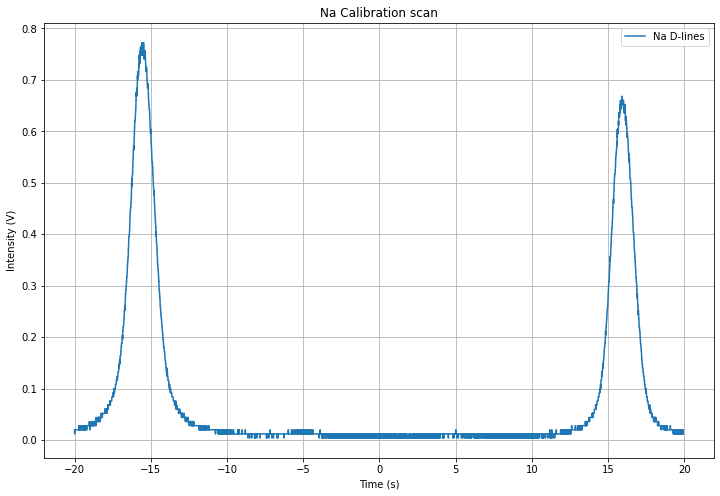

In [4]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Time (s)')
plt.plot(Na['TIME'],-Na['CH1'],'-',label='Na D-lines')
plt.legend();

In [5]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

In [6]:
Na['CH1_smoothed'] = gaussian_filter1d(Na['CH1'], 5)

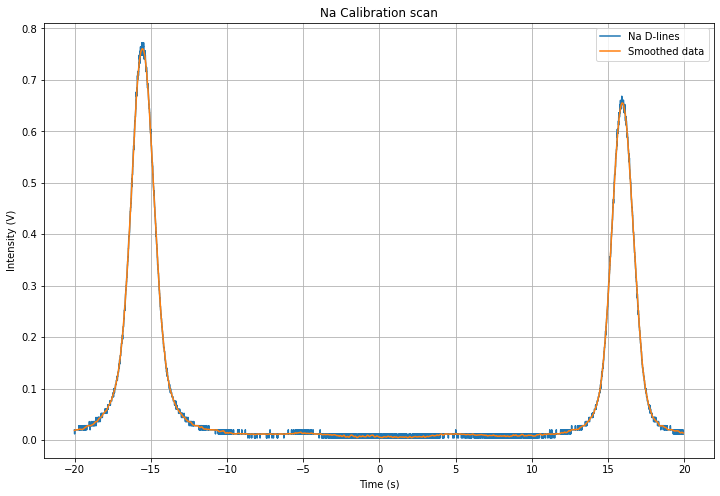

In [7]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Time (s)')
plt.plot(Na['TIME'],-Na['CH1'],'-',label='Na D-lines')
plt.plot(Na['TIME'],-Na['CH1_smoothed'],'-',label='Smoothed data')
plt.legend();

In [8]:
ydata = -Na['CH1_smoothed']
xdata = Na['TIME']

min_width = 50

peaks, pk_props = find_peaks(ydata, width = min_width, height = ydata.max()/2.)

for pk, prop in zip(peaks, pk_props['widths']): 
    print('Peak at {:d} has width {:.1f}'.format(pk, prop))


Peak at 579 has width 234.6
Peak at 4678 has width 220.6


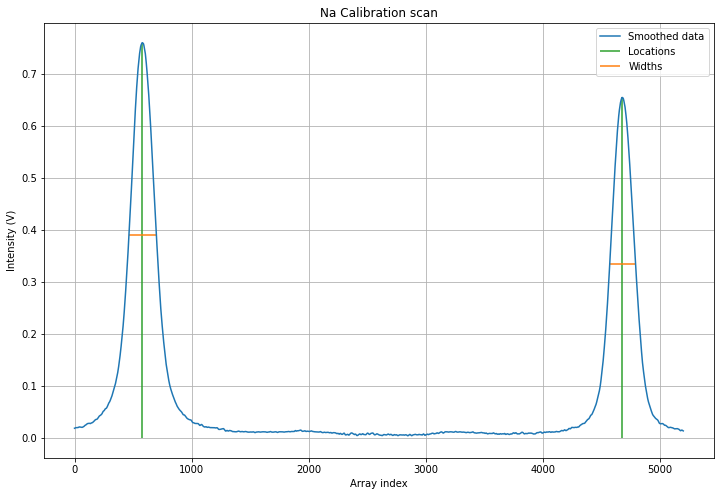

In [9]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Array index')
plt.plot(ydata,'-',label='Smoothed data')
plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
           xmax=peaks+pk_props['widths']/2, color = 'C1', label='Widths')
plt.legend();

In [10]:
Na_peaks = peaks
Na_widths = pk_props['widths']

In [11]:
pk_indices = []
for pk, width in zip(Na_peaks, Na_widths): 
    indices = [i for i in range(ydata.size) if (i > pk-extent*width) and (i < pk+extent*width)]
    pk_indices.append(indices)

NameError: name 'extent' is not defined

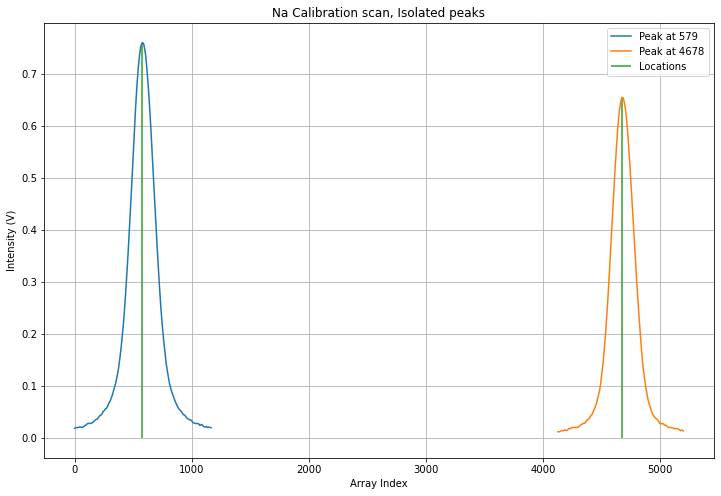

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan, Isolated peaks')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Array Index')
for pk, indices in zip(peaks, pk_indices):
        plt.plot(ydata[indices],'-', label='Peak at {:d}'.format(pk))
plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
plt.legend();

In [ ]:
def get_centroid(xdata,ydata):
    mid = np.sum(xdata*ydata)/np.sum(ydata) 
    return mid

In [ ]:
Peak_loc = []

for pk, indices in zip(Na_peaks, pk_indices) :
    mid_time = get_centroid(xdata[indices],ydata[indices])
    max_time = xdata[pk]
    peak_time = unc.ufloat(mid_time, np.abs(max_time - mid_time))
    Peak_loc.append(peak_time)
    print('Peak at index {:d} = {:.2uP} s'.format(pk,peak_time))

Na_loc = Peak_loc

Peak at index 579 = -15.533±0.020 s
Peak at index 4678 = 15.944±0.015 s
15.943774358907264


In [ ]:
K_Na = (5895.92 - 5889.95)/(Na_loc[1] - Na_loc[0])

print('Calibration constant from centroid method: {:.2uP} A/s'.format(K_Na))

Calibration constant from centroid method: 0.18967±0.00015 A/s


In [ ]:
Alpha = pd.read_csv('HD_Alpha_run1.CSV',skiprows=15)
Beta = pd.read_csv('HD_Beta_run1.CSV',skiprows=15)
Delta = pd.read_csv('HD_Delta_run1.CSV',skiprows=15)
Gamma = pd.read_csv('HD_Gamma_run1.CSV',skiprows=15)
Epsilon1 = pd.read_csv('HD-Epsilon_run1.CSV',skiprows=15)
Epsilon2 = pd.read_csv('HD-Epsilon_run2.CSV',skiprows=15)

Now plot all on one graph.  Don't forget "-" to flip all data sets to positive

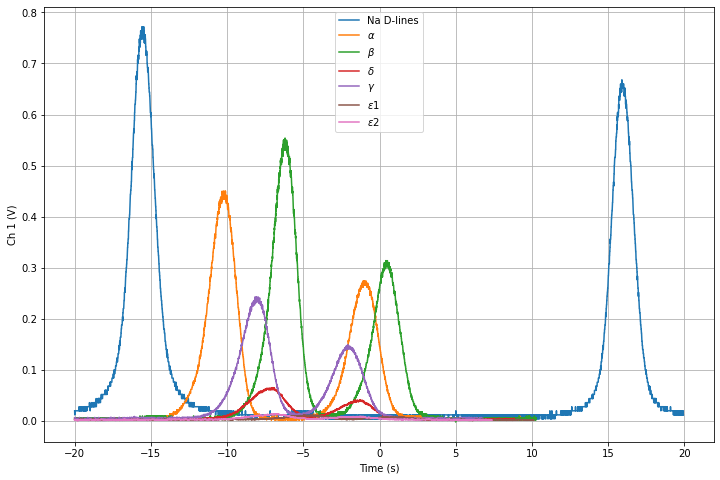

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Na['TIME'],-Na['CH1'],'-',label='Na D-lines')
plt.plot(Alpha['TIME'],-Alpha['CH1'],'-',label=r'$\alpha$')
plt.plot(Beta['TIME'],-Beta['CH1'],'-',label=r'$\beta$')
plt.plot(Delta['TIME'],-Delta['CH1'],'-',label=r'$\delta$')
plt.plot(Gamma['TIME'],-Gamma['CH1'],'-',label=r'$\gamma$')
plt.plot(Epsilon1['TIME'],-Epsilon1['CH1'],'-',label=r'$\epsilon$1')
plt.plot(Epsilon2['TIME'],-Epsilon2['CH1'],'-',label=r'$\epsilon$2')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Ch 1 (V)')
plt.legend()
plt.grid();

Hard to read.  Offset the plots by adding constants to each array, and rescale them by multiplying a constant with each array. 

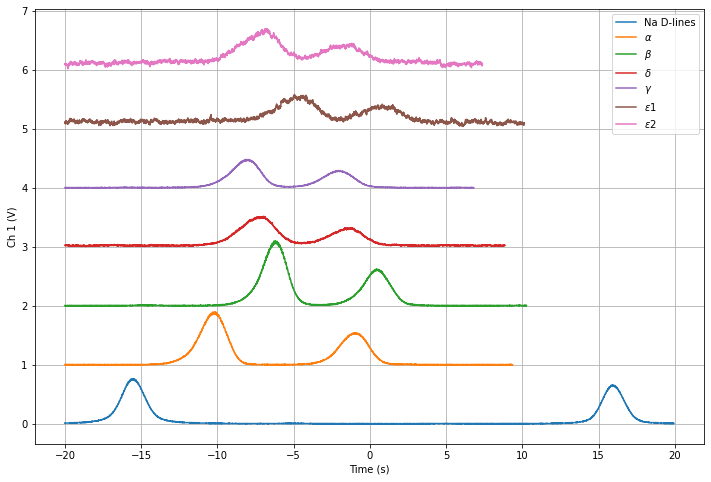

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Na['TIME'],-Na['CH1'],'-',label='Na D-lines')
plt.plot(Alpha['TIME'],-Alpha['CH1']*2+1,'-',label=r'$\alpha$')
plt.plot(Beta['TIME'],-Beta['CH1']*2+2,'-',label=r'$\beta$')
plt.plot(Delta['TIME'],-Delta['CH1']*8+3,'-',label=r'$\delta$')
plt.plot(Gamma['TIME'],-Gamma['CH1']*2+4,'-',label=r'$\gamma$')
plt.plot(Epsilon1['TIME'],-Epsilon1['CH1']*50+5,'-',label=r'$\epsilon$1')
plt.plot(Epsilon2['TIME'],-Epsilon2['CH1']*50+6,'-',label=r'$\epsilon$2')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Ch 1 (V)')
plt.legend()
plt.grid();

In [ ]:
def find_and_plot_peaks(ydata, title='Data', makeplot=True):
    min_width = 50
    peaks, pk_props = find_peaks(ydata, width = min_width, height = ydata.max()/2.)
    for pk, prop in zip(peaks, pk_props['widths']):
        print('Peak at {:d} has width {:.1f}'.format(pk, prop))
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.title(title)
    plt.ylabel(r'Intensity (V)')
    plt.xlabel(r'Array index')
    plt.plot(ydata,'-',label='Smoothed data')
    plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
    plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
           xmax=peaks+pk_props['widths']/2, color = 'C1', label='Widths')
    plt.legend();
    return peaks, pk_props['widths']

In [ ]:
def select_peak_indices(ydata, peaks, widths, title='Data', extent=2.5, makeplot=True):
    pk_indices =[]
    for pk, width in zip(peaks, widths):
        indices = [i for i in range(ydata.size) if (i > pk-extent*width) and (i < pk+extent*width)]
        pk_indices.append(indices)
        
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.title(title)
    plt.ylabel(r'Intensity (V)')
    plt.xlabel(r'Array Index')
    for pk, indices in zip(peaks, pk_indices):
            plt.plot(ydata[indices],'-', label='Peak at {:d}'.format(pk))
    plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
    plt.legend();
    
    return pk_indices


In [ ]:
def calculate_peak_locs(xdata, ydata, peaks, peak_indices):
    mid = np.sum(xdata*ydata)/np.sum(ydata)
    Peak_loc = []
    
    for pk, indices in zip(peaks, peak_indices) :
        mid_time = get_centroid(xdata[indices],ydata[indices])
        max_time = xdata[pk]
        peak_time = unc.ufloat(mid_time, np.abs(max_time - mid_time))
        Peak_loc.append(peak_time)
        print('Peak at index {:d} = {:.2uP} s'.format(pk,peak_time))
    
    return Peak_loc


Peak at 579 has width 234.6
Peak at 4678 has width 220.6
Peak at index 579 = -15.533±0.020 s
Peak at index 4678 = 15.944±0.015 s


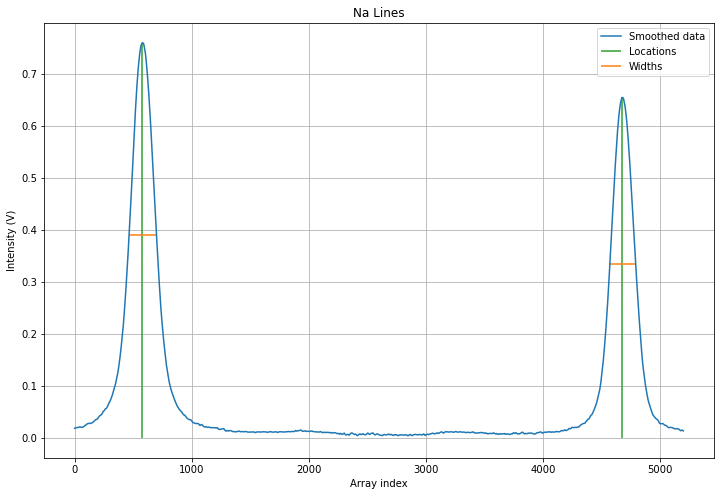

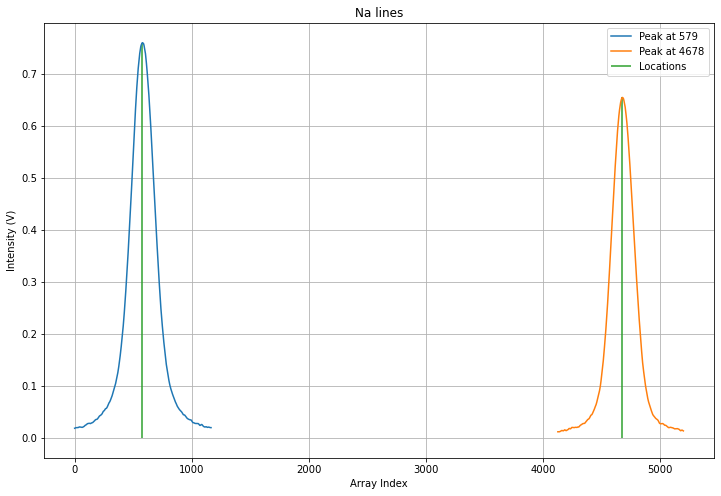

In [ ]:
Na_pks, Na_widths = find_and_plot_peaks(ydata, title='Na Lines', makeplot=True)
Na_test_indices = select_peak_indices(ydata, Na_pks, Na_widths, title='Na lines')
Na_test_loc = calculate_peak_locs(xdata, ydata, Na_pks, Na_test_indices)

### Apply the functions

Work on Alpha first.  Below I show the first example. Re-use `xdata`, `ydata`, `peaks`, and `widths` to save typing.  **But be careful:** if you execute cells out of sequence, you will get peculiar results!!

Peak at 1274 has width 266.7
Peak at 2480 has width 285.6


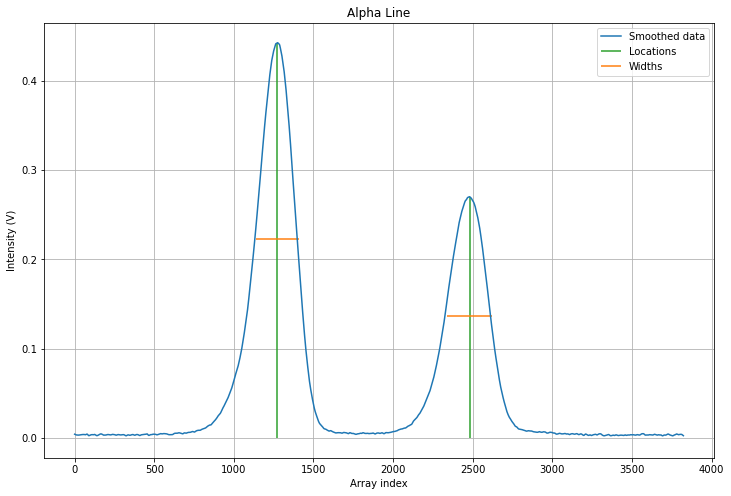

In [ ]:
Alpha['CH1_smoothed'] = gaussian_filter1d(Alpha['CH1'], 5)

xdata = Alpha['TIME']
ydata = -Alpha['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Alpha Line', makeplot=True)

Peak at index 1274 = -10.41±0.19 s
Peak at index 2480 = -1.10±0.15 s


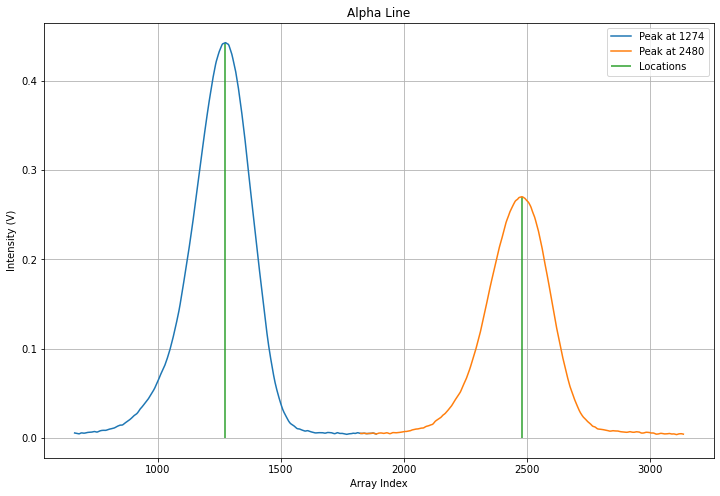

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=2.3, title='Alpha Line')
Alpha_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

Peak at 1798 has width 241.0
Peak at 2670 has width 257.6


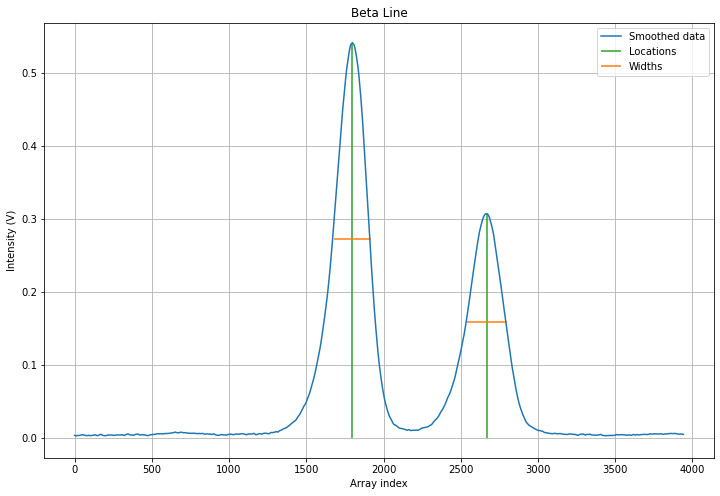

In [ ]:
Beta['CH1_smoothed'] = gaussian_filter1d(Beta['CH1'], 5)

xdata = Beta['TIME']
ydata = -Beta['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Beta Line', makeplot=True)

Peak at index 1798 = -6.33±0.14 s
Peak at index 2670 = 0.38±0.13 s


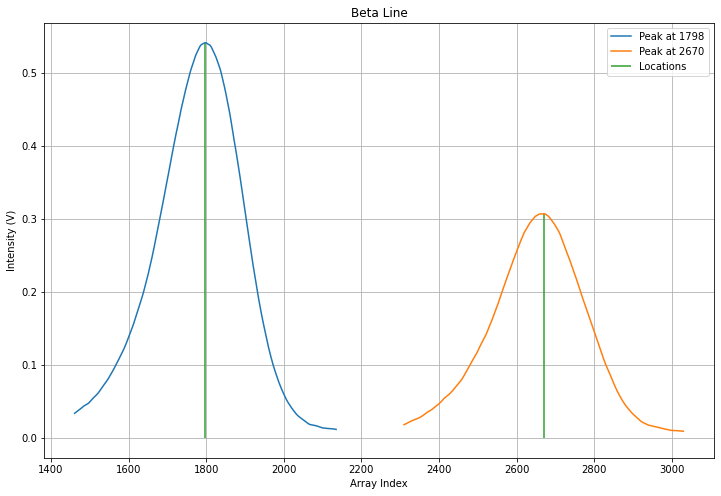

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=1.4, title='Beta Line')
Beta_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

Peak at 1564 has width 286.8
Peak at 2334 has width 294.2


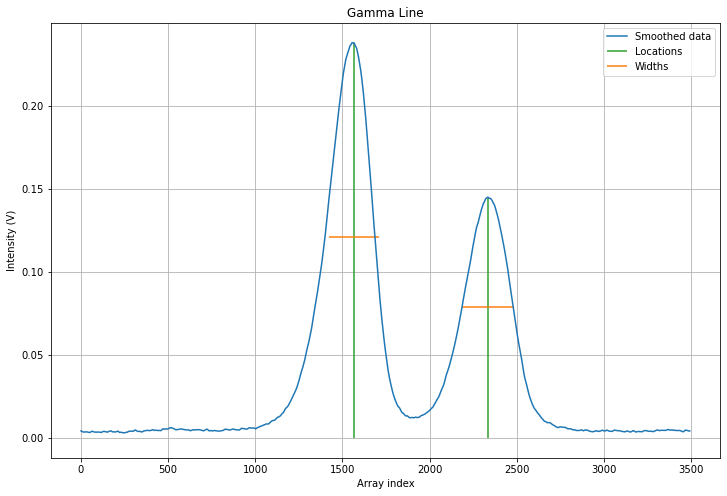

In [ ]:
Gamma['CH1_smoothed'] = gaussian_filter1d(Gamma['CH1'], 5)

xdata = Gamma['TIME']
ydata = -Gamma['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Gamma Line', makeplot=True)

Peak at index 1564 = -8.20±0.21 s
Peak at index 2334 = -2.139±0.065 s


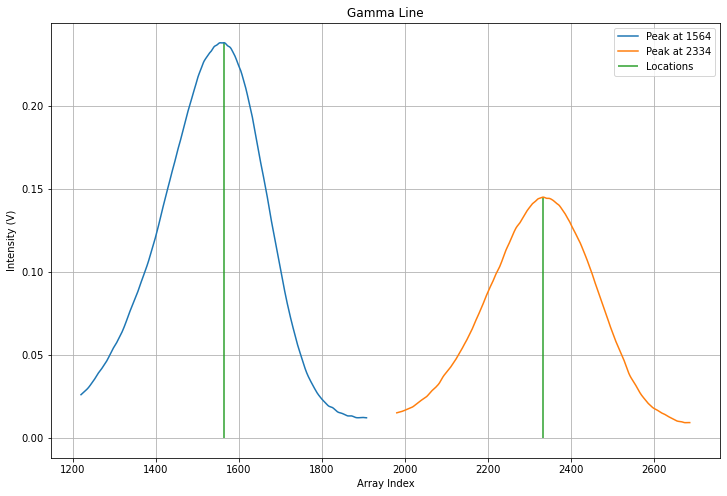

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=1.2, title='Gamma Line')
Gamma_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

Peak at 1692 has width 361.6
Peak at 2439 has width 290.8


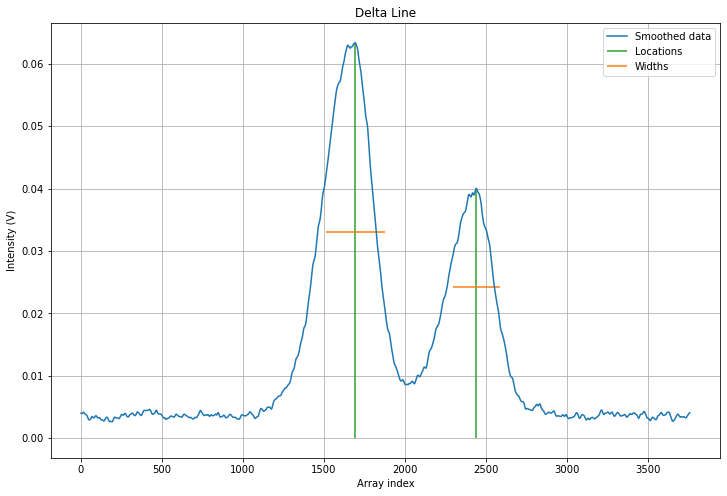

In [ ]:
Delta['CH1_smoothed'] = gaussian_filter1d(Delta['CH1'], 5)

xdata = Delta['TIME']
ydata = -Delta['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Delta Line', makeplot=True)

Peak at index 1692 = -7.29±0.28 s
Peak at index 2439 = -1.47±0.21 s


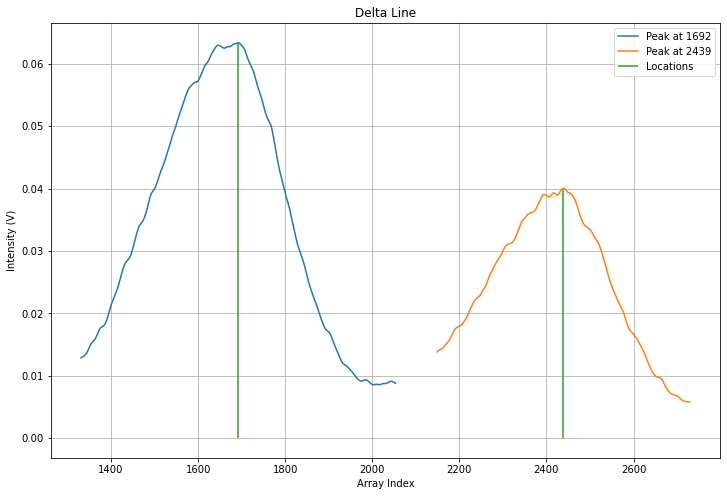

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=1.0, title='Delta Line')
Delta_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

Peak at 1961 has width 392.0
Peak at 2711 has width 341.2


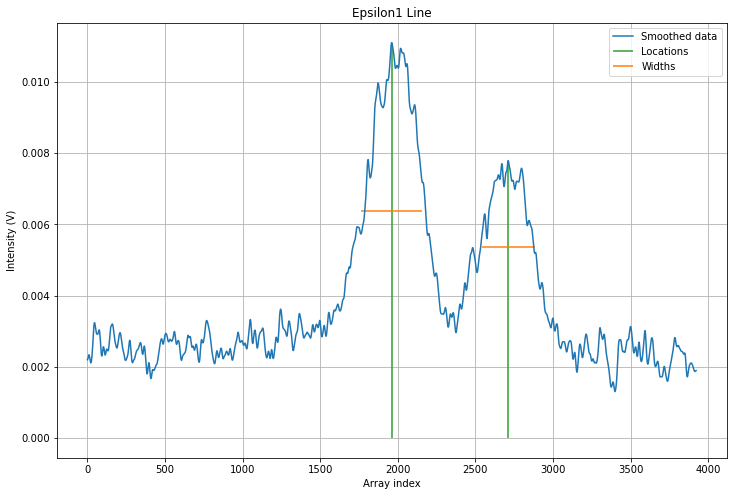

In [ ]:
Epsilon1['CH1_smoothed'] = gaussian_filter1d(Epsilon1['CH1'], 5)

xdata = Epsilon1['TIME']
ydata = -Epsilon1['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Epsilon1 Line', makeplot=True)

Peak at index 1961 = -4.903±0.036 s
Peak at index 2711 = 0.748±0.074 s


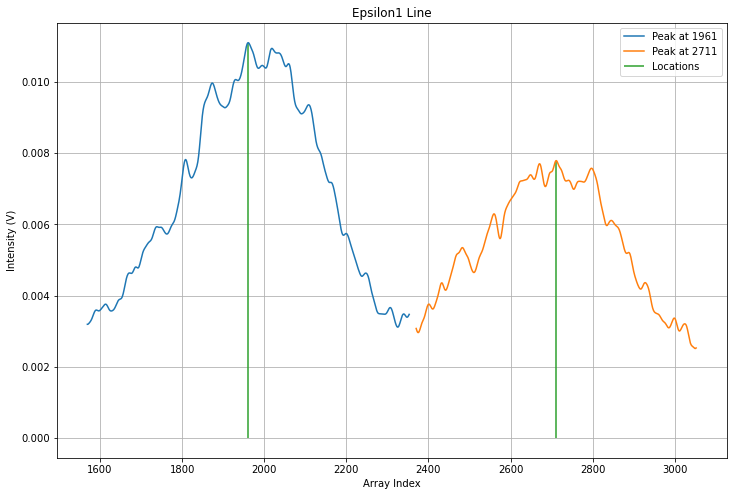

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=1.0, title='Epsilon1 Line')
Epsilon1_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

Peak at 1723 has width 416.3
Peak at 2442 has width 349.4


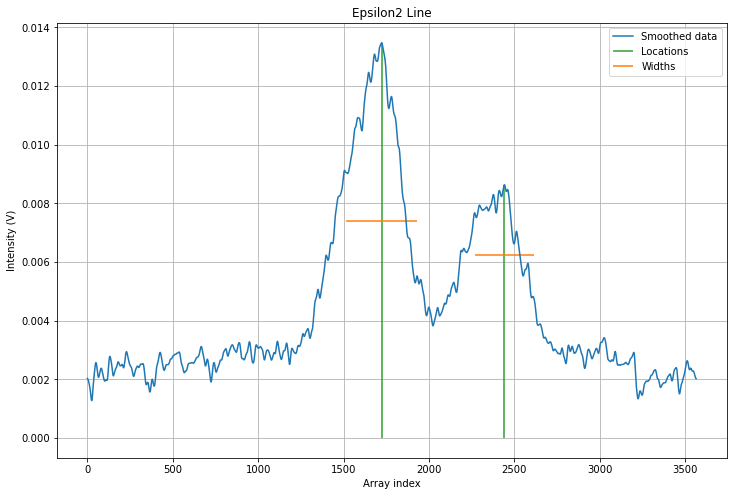

In [ ]:
Epsilon2['CH1_smoothed'] = gaussian_filter1d(Epsilon2['CH1'], 5)

xdata = Epsilon2['TIME']
ydata = -Epsilon2['CH1_smoothed']

peaks, widths = find_and_plot_peaks(ydata, title='Epsilon2 Line', makeplot=True)

Peak at index 1723 = -6.95±0.18 s
Peak at index 2442 = -1.50±0.26 s


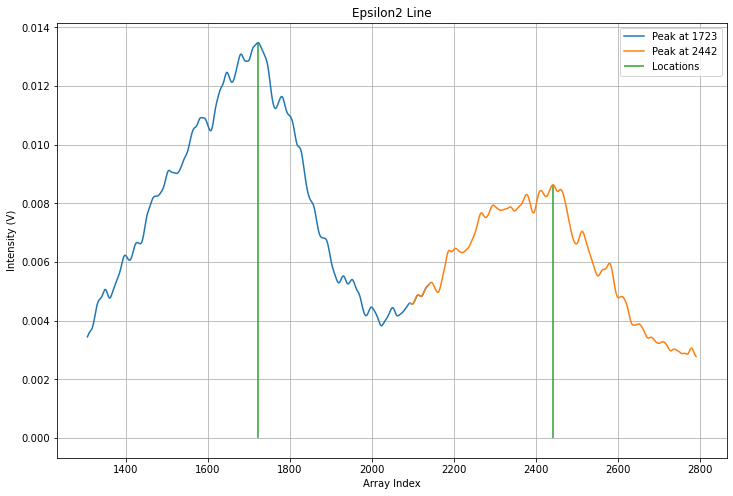

In [ ]:
indices = select_peak_indices(ydata, peaks, widths, extent=1.0, title='Epsilon2 Line')
Epsilon2_loc = calculate_peak_locs(xdata, ydata, peaks, indices)

In [ ]:
D_T = [Alpha_loc[1]-Alpha_loc[0],
      Beta_loc[1]-Beta_loc[0],
      Gamma_loc[1]-Gamma_loc[0],
      Delta_loc[1]-Delta_loc[0],
      Epsilon1_loc[1]-Epsilon1_loc[0],
      Epsilon2_loc[1]-Epsilon2_loc[0]]
D_T

[9.3091172419246+/-0.24477270486631617,
 6.706720650150121+/-0.192856883411132,
 6.062808325798578+/-0.223814409253001,
 5.810212870665671+/-0.34910886550951575,
 5.650680712860613+/-0.08200875499652993,
 5.444665523613593+/-0.3162300820482736]

In [ ]:
Delta_T = pd.Series({'Alpha': Alpha_loc[1]-Alpha_loc[0],
                   'Beta': Beta_loc[1]-Beta_loc[0],
                   'Gamma': Gamma_loc[1]-Gamma_loc[0],
                   'Delta': Delta_loc[1]-Delta_loc[0],
                   'Epsilon': (Epsilon1_loc[1]+Epsilon2_loc[1]-Epsilon1_loc[0]-Epsilon2_loc[0])/2.0})
Delta_T

Alpha      9.31+/-0.24
Beta       6.71+/-0.19
Gamma      6.06+/-0.22
Delta      5.81+/-0.35
Epsilon    5.55+/-0.16
dtype: object

In [ ]:
lambda_H = pd.Series({'Alpha': 6562.79,
                   'Beta': 4863.33,
                   'Gamma': 4340.46,
                   'Delta': 4101.73,
                   'Epsilon': 3970.07})
lambda_H

Alpha      6562.79
Beta       4863.33
Gamma      4340.46
Delta      4101.73
Epsilon    3970.07
dtype: float64

In [ ]:
HD_results = pd.DataFrame({'lambda_H (A)':lambda_H, 'Delta-t (s)': Delta_T})
HD_results

,lambda_H (A),Delta-t (s)
Alpha,6562.79,9.31+/-0.24
Beta,4863.33,6.71+/-0.19
Gamma,4340.46,6.06+/-0.22
Delta,4101.73,5.81+/-0.35
Epsilon,3970.07,5.55+/-0.16


In [ ]:
HD_results['Delta-lambda (A)'] = HD_results['Delta-t (s)']*K_Na
HD_results

,lambda_H (A),Delta-t (s),Delta-lambda (A)
Alpha,6562.79,9.31+/-0.24,1.77+/-0.05
Beta,4863.33,6.71+/-0.19,1.27+/-0.04
Gamma,4340.46,6.06+/-0.22,1.15+/-0.04
Delta,4101.73,5.81+/-0.35,1.10+/-0.07
Epsilon,3970.07,5.55+/-0.16,1.052+/-0.031


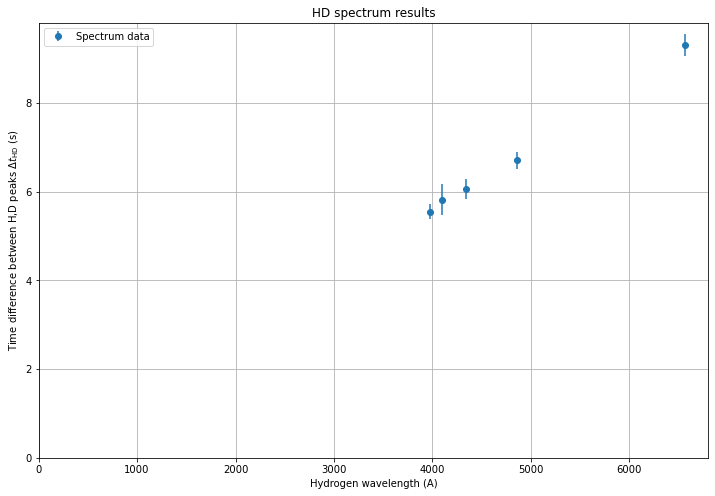

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('HD spectrum results')
plt.ylim(0,9.8)
plt.xlim(0,6800.0)
plt.ylabel(r'Time difference between H,D peaks $\Delta t_{\rm HD}$ (s)')
plt.xlabel(r'Hydrogen wavelength (A)')
## up.nominal_values() and up.std_devs() separates out the values and uncertainties from the uncertainty
## objects
plt.errorbar(HD_results['lambda_H (A)'],up.nominal_values(HD_results['Delta-t (s)']),fmt='o',
             yerr=up.std_devs(HD_results['Delta-t (s)']),label='Spectrum data');
plt.legend();



In [ ]:
Cal_data = np.array([
    [643.85, 41.43],
    [579.07, 37.24],
    [576.96, 37.11],
    [546.08, 35.10],
    [508.58, 32.68],
    [479.99, 30.83],
    [467.81, 30.04],
    [435.83, 27.96],
    [404.66, 25.98]])

wavelength = Cal_data[:,0]
position = Cal_data[:,1]

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 9
    # variables        = 2
    chi-square         = 0.18041902
    reduced chi-square = 0.02577415
    Akaike info crit   = -31.1872805
    Bayesian info crit = -30.7928313
[[Variables]]
    slope:      15.4639413 +/- 0.01139807 (0.07%) (init = 15.46394)
    intercept:  3.20598011 +/- 0.38164201 (11.90%) (init = 3.20598)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.990

Slope =  15.463941344548298 +/- 0.01139806675222934


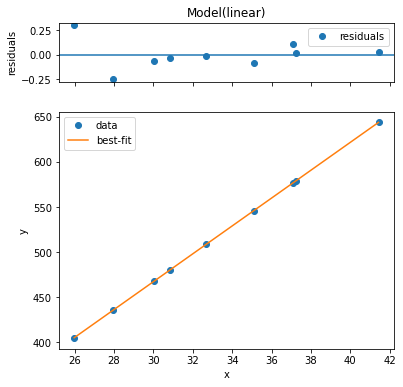

In [ ]:
line = LinearModel()
param_guess = line.guess(wavelength, x=position)
line_fit = line.fit(wavelength, param_guess, x=position)

print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)

line_fit.plot();

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 5
    # variables        = 2
    chi-square         = 0.02222595
    reduced chi-square = 0.00740865
    Akaike info crit   = -23.0796625
    Bayesian info crit = -23.8607867
[[Variables]]
    slope:      0.00143937 +/- 4.0604e-05 (2.82%) (init = 0.00143937)
    intercept: -0.17514167 +/- 0.19737487 (112.69%) (init = -0.1751417)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.981

Slope =  0.0014393696443213031 +/- 4.060362267490025e-05


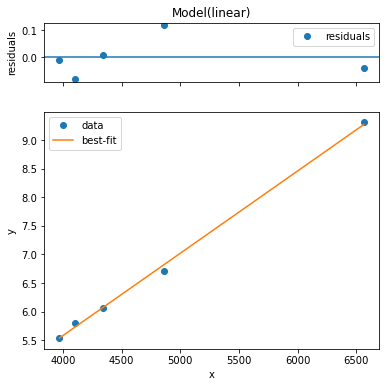

In [ ]:
xdata = HD_results['lambda_H (A)']
ydata = up.nominal_values(HD_results['Delta-t (s)'])
yuncert = up.std_devs(HD_results['Delta-t (s)'])

param_guess = line.guess(ydata, x=xdata)
line_fit = line.fit(ydata, param_guess, x=xdata)

print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)

line_fit.plot();

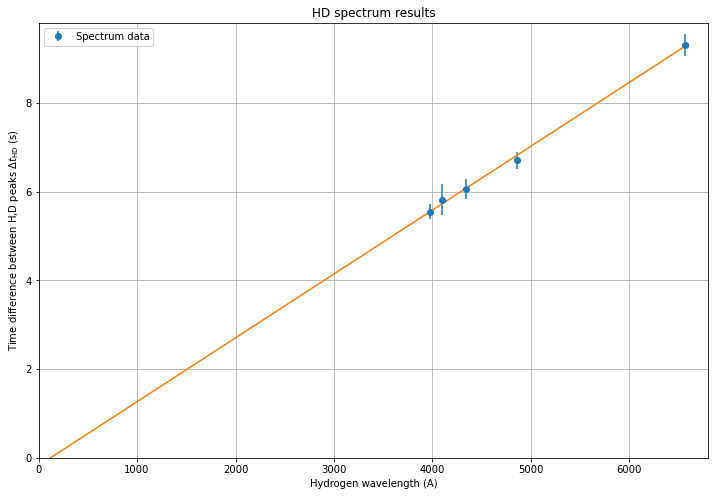

In [ ]:
xfit = np.linspace(0,6600,10)
yfit = line_fit.eval(line_fit.params, x=xfit)

plt.figure(figsize=(12,8))
plt.grid()
plt.title('HD spectrum results')
plt.ylim(0,9.8)
plt.xlim(0,6800.0)
plt.ylabel(r'Time difference between H,D peaks $\Delta t_{\rm HD}$ (s)')
plt.xlabel(r'Hydrogen wavelength (A)')
plt.errorbar(HD_results['lambda_H (A)'],up.nominal_values(HD_results['Delta-t (s)']),fmt='o',
             yerr=up.std_devs(HD_results['Delta-t (s)']),label='Spectrum data');
plt.legend();
plt.plot(xfit,yfit);

In [ ]:
HD_slope = unc.ufloat(line_fit.params['slope'].value,line_fit.params['slope'].stderr)

mass_ratio = -1*(HD_slope*K_Na*(1+1836.15)-1)

print('Calculated Mass ratio of hydrogen/deuterium = {:.3uP}'.format(mass_ratio))

Calculated Mass ratio of hydrogen/deuterium = 0.4985±0.0142
